<a href="https://colab.research.google.com/github/sipocz/XLS_Conv/blob/main/XLS_converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import os

In [128]:
!rm *.xlsx*

In [129]:
urlname="https://github.com/sipocz/XLS_Conv/raw/main/U113_20210621.xlsx"
_,fname= os.path.split(urlname)

In [130]:
!wget $urlname

--2021-09-25 15:48:11--  https://github.com/sipocz/XLS_Conv/raw/main/U113_20210621.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/XLS_Conv/main/U113_20210621.xlsx [following]
--2021-09-25 15:48:11--  https://raw.githubusercontent.com/sipocz/XLS_Conv/main/U113_20210621.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5550077 (5.3M) [application/octet-stream]
Saving to: ‘U113_20210621.xlsx’

U113_20210621.xlsx  100%[===================>]   5.29M  --.-KB/s    in 0.06s   

2021-09-25 15:48:11 (83.3 MB/s) - ‘U113_20210621.xlsx’ saved [5550077/5550077]



In [131]:
df=pd.read_excel(fname,sheet_name=3)

In [132]:
df.columns=["Date","Value","Status"]

In [133]:
df.tail()

,Date,Value,Status
29168,2021-06-25 23:59:00,33.093002,OK
29169,2021-06-25 23:59:20,33.093002,OK
29170,2021-06-25 23:59:30,32.993820,OK
29171,2021-06-25 23:59:50,32.993820,OK
29172,True,NaN,NaN


In [134]:
df.dropna(inplace=True)

In [135]:
df.Date[0]

datetime.datetime(2021, 6, 21, 0, 0, 22)

In [136]:
#pd.to_datetime(df.Date, format="%Y-%m-%d %H:%M:%S")

In [137]:
df.index=df.Date

In [138]:
df.describe()

,Value
count,29172.000000
mean,61.818723
std,24.257954
min,-50.000000
25%,69.741356
50%,70.767532
75%,72.743568
max,200.000000


In [139]:
df.Date.values[-1]

datetime.datetime(2021, 6, 25, 23, 59, 50)

In [140]:
new_range = pd.date_range(df.Date.values[0], df.Date.values[-2], freq='10S')

In [141]:
new_range

DatetimeIndex(['2021-06-21 00:00:22', '2021-06-21 00:00:32',
               '2021-06-21 00:00:42', '2021-06-21 00:00:52',
               '2021-06-21 00:01:02', '2021-06-21 00:01:12',
               '2021-06-21 00:01:22', '2021-06-21 00:01:32',
               '2021-06-21 00:01:42', '2021-06-21 00:01:52',
               ...
               '2021-06-25 23:57:52', '2021-06-25 23:58:02',
               '2021-06-25 23:58:12', '2021-06-25 23:58:22',
               '2021-06-25 23:58:32', '2021-06-25 23:58:42',
               '2021-06-25 23:58:52', '2021-06-25 23:59:02',
               '2021-06-25 23:59:12', '2021-06-25 23:59:22'],
              dtype='datetime64[ns]', length=43195, freq='10S')

In [142]:
type(df)

pandas.core.frame.DataFrame

In [143]:
df.set_index("Date",inplace=True)

In [144]:
df.head()

,Value,Status
Date,,
2021-06-21 00:00:22,-50.0,Bad Data
2021-06-21 00:00:42,-50.0,Bad Data
2021-06-21 00:01:02,-50.0,Bad Data
2021-06-21 00:01:22,-50.0,Bad Data
2021-06-21 00:01:42,-50.0,Bad Data


In [145]:
df.head()

,Value,Status
Date,,
2021-06-21 00:00:22,-50.0,Bad Data
2021-06-21 00:00:42,-50.0,Bad Data
2021-06-21 00:01:02,-50.0,Bad Data
2021-06-21 00:01:22,-50.0,Bad Data
2021-06-21 00:01:42,-50.0,Bad Data


In [146]:
bad_data=df[df["Status"]=="Bad Data"].index

In [147]:
bad_data

DatetimeIndex(['2021-06-21 00:00:22', '2021-06-21 00:00:42',
               '2021-06-21 00:01:02', '2021-06-21 00:01:22',
               '2021-06-21 00:01:42', '2021-06-21 00:02:02',
               '2021-06-21 00:02:22', '2021-06-21 00:02:42',
               '2021-06-21 00:03:02', '2021-06-21 00:03:22',
               ...
               '2021-06-21 05:22:02', '2021-06-21 05:22:22',
               '2021-06-21 05:22:42', '2021-06-21 05:23:02',
               '2021-06-21 05:23:22', '2021-06-21 05:23:42',
               '2021-06-21 05:24:02', '2021-06-21 05:24:22',
               '2021-06-21 05:24:42', '2021-06-21 05:25:02'],
              dtype='datetime64[ns]', name='Date', length=975, freq=None)

In [148]:
df

,Value,Status
Date,,
2021-06-21 00:00:22,-50.000000,Bad Data
2021-06-21 00:00:42,-50.000000,Bad Data
2021-06-21 00:01:02,-50.000000,Bad Data
2021-06-21 00:01:22,-50.000000,Bad Data
2021-06-21 00:01:42,-50.000000,Bad Data
...,...,...
2021-06-25 23:58:40,33.093002,OK
2021-06-25 23:59:00,33.093002,OK
2021-06-25 23:59:20,33.093002,OK


In [149]:
df.drop(index=bad_data,inplace=True)

In [150]:
type(df)

pandas.core.frame.DataFrame

In [151]:
df.describe()

,Value
count,28197.000000
mean,65.685207
std,12.707699
min,27.264061
25%,70.126648
50%,70.767532
75%,72.846573
max,200.000000


In [152]:
df.head()

,Value,Status
Date,,
2021-06-21 05:25:10,200.000000,OK
2021-06-21 05:25:13,88.632034,OK
2021-06-21 05:25:23,28.484779,OK
2021-06-21 05:25:40,28.385597,OK
2021-06-21 05:25:50,28.484779,OK


In [153]:
df.reset_index(inplace=True)

In [154]:
df.drop(columns=["Status"], inplace=True)

In [155]:
new_range = pd.date_range(df.index.values[0], df.index.values[-1], freq='10S')

In [156]:
new_range

DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', freq='10S')

In [157]:
df.reindex()

,Date,Value
0,2021-06-21 05:25:10,200.000000
1,2021-06-21 05:25:13,88.632034
2,2021-06-21 05:25:23,28.484779
3,2021-06-21 05:25:40,28.385597
4,2021-06-21 05:25:50,28.484779
...,...,...
28192,2021-06-25 23:58:40,33.093002
28193,2021-06-25 23:59:00,33.093002
28194,2021-06-25 23:59:20,33.093002
28195,2021-06-25 23:59:30,32.993820


In [158]:
df.set_index("Date",inplace=True)

In [159]:
df

,Value
Date,
2021-06-21 05:25:10,200.000000
2021-06-21 05:25:13,88.632034
2021-06-21 05:25:23,28.484779
2021-06-21 05:25:40,28.385597
2021-06-21 05:25:50,28.484779
...,...
2021-06-25 23:58:40,33.093002
2021-06-25 23:59:00,33.093002
2021-06-25 23:59:20,33.093002


In [160]:
df3

,Value
Date,
2021-06-21 05:25:10,200.000000
2021-06-21 05:25:11,162.877345
2021-06-21 05:25:12,125.754690
2021-06-21 05:25:13,88.632034
2021-06-21 05:25:14,82.617309
...,...
2021-06-25 23:59:46,32.993820
2021-06-25 23:59:47,32.993820
2021-06-25 23:59:48,32.993820


In [161]:
index = pd.date_range('1/1/2019', periods=8, freq='T')
series = pd.Series(range(8), index=index)
series

2019-01-01 00:00:00    0
2019-01-01 00:01:00    1
2019-01-01 00:02:00    2
2019-01-01 00:03:00    3
2019-01-01 00:04:00    4
2019-01-01 00:05:00    5
2019-01-01 00:06:00    6
2019-01-01 00:07:00    7
Freq: T, dtype: int64

In [162]:
df3=df.resample("1s").mean()

In [163]:
df3.head(30)

,Value
Date,
2021-06-21 05:25:10,200.000000
2021-06-21 05:25:11,NaN
2021-06-21 05:25:12,NaN
2021-06-21 05:25:13,88.632034
2021-06-21 05:25:14,NaN
2021-06-21 05:25:15,NaN
2021-06-21 05:25:16,NaN
2021-06-21 05:25:17,NaN
2021-06-21 05:25:18,NaN


In [164]:
df3.interpolate('linear',inplace=True)

In [165]:
df3

,Value
Date,
2021-06-21 05:25:10,200.000000
2021-06-21 05:25:11,162.877345
2021-06-21 05:25:12,125.754690
2021-06-21 05:25:13,88.632034
2021-06-21 05:25:14,82.617309
...,...
2021-06-25 23:59:46,32.993820
2021-06-25 23:59:47,32.993820
2021-06-25 23:59:48,32.993820


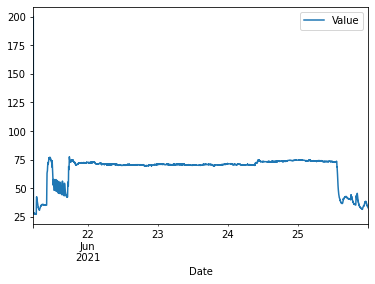

In [166]:
df3.plot();

In [168]:
tabs = pd.ExcelFile(fname).sheet_names 
print(tabs)

['AS_P113B', 'AS_PH113', 'AS_T113F', 'AS_T1131', 'AS_T1132', 'AS_T1133', 'AS_T1134', 'AS_T1135']


In [191]:
def get_data1s(fname,sheet_name):
    import pandas as pd
    df=pd.read_excel(fname,sheet_name=sheet_name)
    df.columns=["Date","Value","Status"]
    bad_data=df[df["Status"]=="Bad Data"].index
    df.drop(index=bad_data,inplace=True)
    df.dropna(inplace=True)
    df.index=df.Date
    df.set_index("Date",inplace=True)
    df.drop(columns=["Status"], inplace=True)
    dfout=df.resample("1s").mean()
    dfout.interpolate('linear',inplace=True)
    return(dfout)



In [200]:
df0=get_data1s(fname,tabs[0])

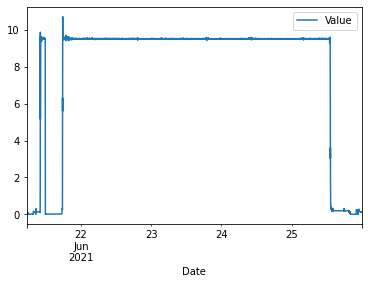

In [201]:
df0.plot();

In [194]:
df1=get_data1s(fname,tabs[1])

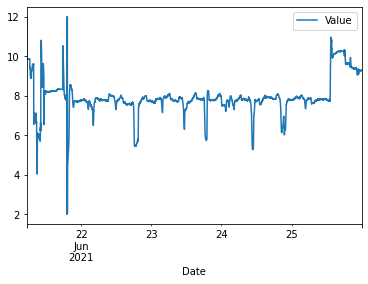

In [195]:
df1.plot();

In [196]:
df2=get_data1s(fname,tabs[2])

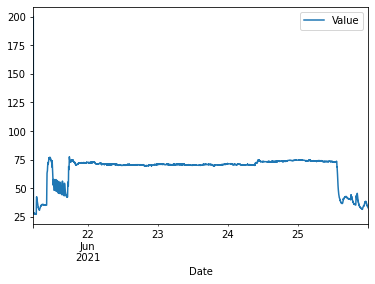

In [197]:
df2.plot()

In [204]:
df3=get_data1s(fname,tabs[3])

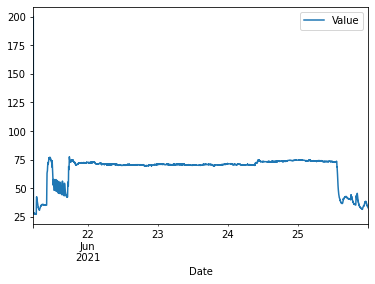

In [205]:
df3.plot()

In [210]:
def df_list(fname,tabs):
    out_df_list=[]
    for tabx in tabs:
        dftab=get_data1s(fname,tabx)
        dftab.plot()
        out_df_list.append(dftab)
    return out_df_list 

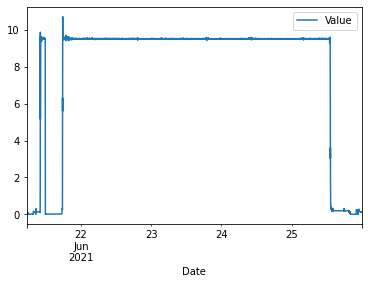

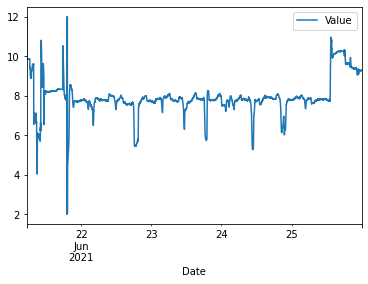

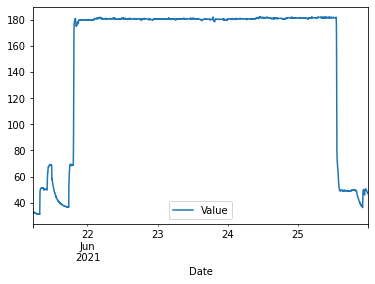

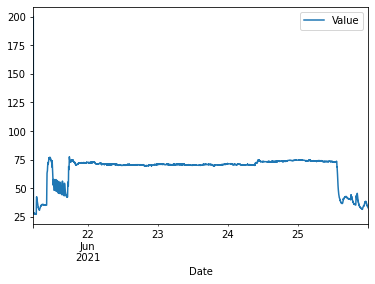

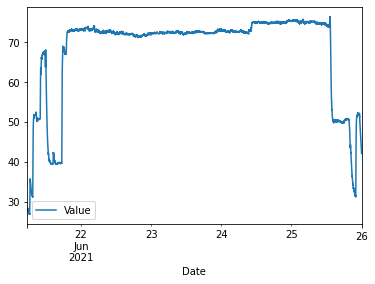

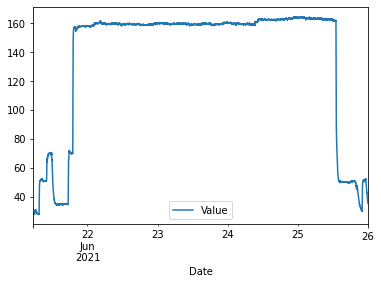

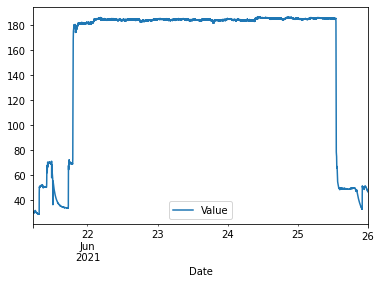

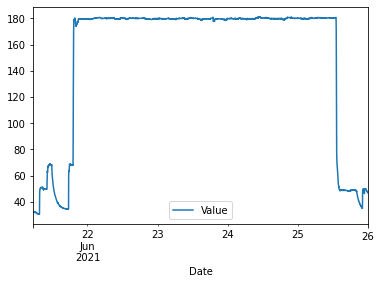

In [211]:
all_df=df_list(fname,tabs)

In [300]:
def df_concat(dflist,df_heads):
    for index,name in enumerate(df_heads):
        dflist[index].columns=[name]
    out_df=pd.concat(dflist,axis=1)
    #out_df.head=df_heads
    out_df.dropna(inplace=True)
    return(out_df)

In [301]:


allDF=df_concat(all_df,tabs)

In [302]:
all_df[0].head()

,AS_P113B
Date,
2021-06-21 05:25:13,0.085145
2021-06-21 05:25:14,0.085145
2021-06-21 05:25:15,0.085145
2021-06-21 05:25:16,0.085145
2021-06-21 05:25:17,0.085145


In [304]:
allDF.head()

,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
Date,,,,,,,,
2021-06-21 05:25:13,0.085145,12.0,32.623787,88.632034,29.072250,29.194321,30.231174,31.9646
2021-06-21 05:25:14,0.085145,12.0,32.631722,82.617309,29.016936,29.157318,30.234989,31.9646
2021-06-21 05:25:15,0.085145,12.0,32.639657,76.602583,28.961623,29.120316,30.238804,31.9646
2021-06-21 05:25:16,0.085145,12.0,32.647592,70.587858,28.906309,29.083313,30.242619,31.9646
2021-06-21 05:25:17,0.085145,12.0,32.655527,64.573132,28.850995,29.046310,30.246433,31.9646


In [305]:
allDF.to_csv("20210621.csv",sep=";")

In [306]:
allDF.describe()

,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
count,412471.000000,412471.000000,412471.000000,412471.000000,412471.000000,412471.000000,412471.000000,412471.000000
mean,7.772482,7.931289,152.158555,66.207517,67.915377,136.195191,155.054964,151.518716
std,3.654860,0.898354,54.481435,12.401830,11.481867,46.669718,56.244205,54.508778
min,0.000000,2.000000,31.192493,27.264061,26.825363,27.973602,28.650339,30.453957
25%,9.507668,7.705719,179.562073,70.214386,71.898605,157.774475,181.379105,179.198898
50%,9.515793,7.816281,180.386047,70.767532,72.514687,159.393268,184.214656,179.794006
75%,9.522499,7.984772,180.764481,73.101613,73.469950,160.391388,184.875259,180.105286
max,10.722134,12.000000,182.195770,88.632034,76.455330,164.534225,186.782639,181.374832


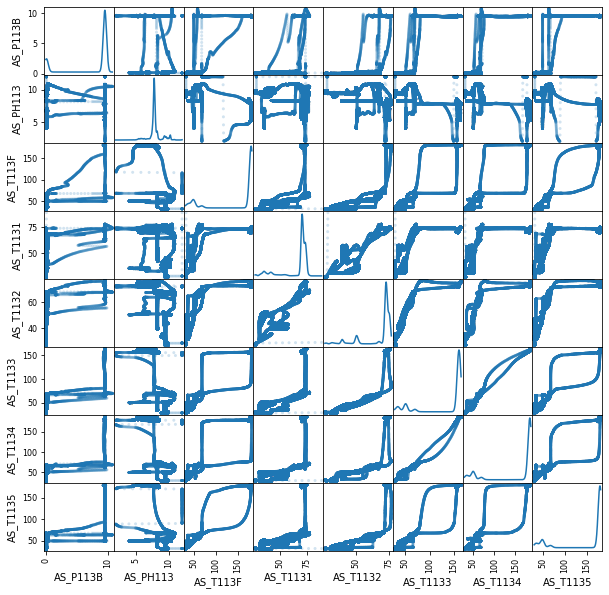

In [250]:
# Készítsünk egy scatter plotot!
from pandas.plotting import scatter_matrix

scatter_matrix(allDF, alpha = 0.2, figsize = (10, 10), diagonal = 'kde');

In [307]:
start_time =pd.Timestamp("2021-06-21 23:00:00")
end_time   =pd.Timestamp("2021-06-25 13:00:00")
print(allDF.loc[start_time])
print("-"*30)
print(allDF.loc[end_time])

AS_P113B      9.522150
AS_PH113      7.729610
AS_T113F    179.491867
AS_T1131     72.083618
AS_T1132     72.892349
AS_T1133    157.583740
AS_T1134    180.926224
AS_T1135    179.421677
Name: 2021-06-21 23:00:00, dtype: float64
------------------------------
AS_P113B      9.532616
AS_PH113      7.728817
AS_T113F    181.515228
AS_T1131     73.128860
AS_T1132     74.013885
AS_T1133    161.707489
AS_T1134    184.551163
AS_T1135    180.700394
Name: 2021-06-25 13:00:00, dtype: float64


In [308]:
allDF.tail()


,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
Date,,,,,,,,
2021-06-25 23:59:39,0.107805,9.287937,47.000839,32.99382,42.062637,35.588806,46.66209,46.710918
2021-06-25 23:59:40,0.107805,9.287842,47.000839,32.99382,42.053864,35.584038,46.66209,46.710918
2021-06-25 23:59:41,0.107805,9.287746,47.000839,32.99382,42.056057,35.579174,46.66003,46.710918
2021-06-25 23:59:42,0.107805,9.287651,47.000839,32.99382,42.058250,35.574310,46.65797,46.710918
2021-06-25 23:59:43,0.107805,9.287556,47.000839,32.99382,42.060444,35.569447,46.65591,46.710918


In [320]:
actual_df = allDF[
    (allDF.index > start_time ) &
    (allDF.index < end_time)
]

In [321]:
actual_df.head()

,AS_P113B,AS_PH113,AS_T113F,AS_T1131,AS_T1132,AS_T1133,AS_T1134,AS_T1135
Date,,,,,,,,
2021-06-21 23:00:01,9.521567,7.72961,179.491867,72.083618,72.892349,157.58374,180.936396,179.421677
2021-06-21 23:00:02,9.520984,7.72961,179.491867,72.083618,72.892349,157.58374,180.946569,179.421677
2021-06-21 23:00:03,9.520402,7.72961,179.491867,72.083618,72.892349,157.58374,180.956741,179.421677
2021-06-21 23:00:04,9.519819,7.72961,179.491867,72.083618,72.892349,157.58374,180.966914,179.421677
2021-06-21 23:00:05,9.519236,7.72961,179.491867,72.083618,72.901123,157.58374,180.977086,179.421677


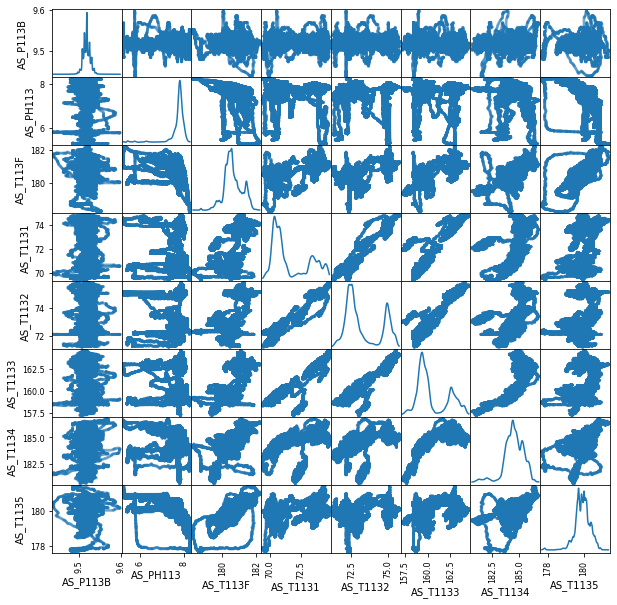

In [322]:

scatter_matrix(actual_df, alpha = 0.2, figsize = (10, 10), diagonal = 'kde');

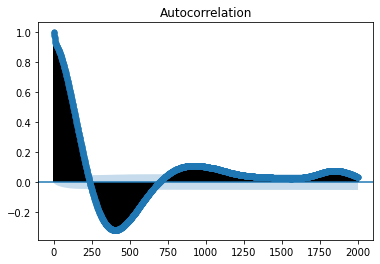

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
dta = actual_df.AS_P113B[:]
dta.index = actual_df.index[:]


sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=2000)
plt.show()

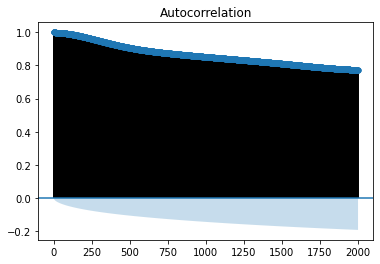

In [329]:
dta = actual_df.AS_T113F[:]
dta.index = actual_df.index[:]


sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=2000)
plt.show()